<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Auto_Image_Segmentation_using_YOLO11_%26_SAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://universe.roboflow.com/brain-tumor-detection-wsera/tumor-detection-ko5jp/dataset/8

In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 21.4 MB/s eta 0:00:00


# Downloading Data

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
version = project.version(8)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-8 in yolov11:: 100%|██████████| 3924/3924 [00:00<00:00, 4623.95it/s]


# Training Object Detection model

In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/Tumor-Detection-8/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 67.3MB/s]


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Tumor-Detection-8/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Tumor-Detection-8/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<00:00, 1448.31it/s]

train: WARNING ⚠️ /content/Tumor-Detection-8/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
train: New cache created: /content/Tumor-Detection-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Tumor-Detection-8/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 499.75it/s]

val: New cache created: /content/Tumor-Detection-8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.5G     0.9106      3.029      1.278         16        640: 100%|██████████| 86/86 [00:29<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]

                   all        395        415      0.918      0.187      0.394      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.39G     0.9409      1.979       1.28         20        640: 100%|██████████| 86/86 [00:27<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]


                   all        395        415      0.631      0.379        0.4      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.39G      0.945      1.696      1.274         27        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


                   all        395        415      0.824      0.438      0.498      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.39G      0.924       1.52      1.253         21        640: 100%|██████████| 86/86 [00:25<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]

                   all        395        415      0.656       0.43      0.436      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.39G     0.9194      1.348       1.26         22        640: 100%|██████████| 86/86 [00:24<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]

                   all        395        415      0.671       0.53      0.539      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.39G     0.8579      1.201      1.241         13        640: 100%|██████████| 86/86 [00:26<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]

                   all        395        415      0.765      0.463      0.536      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.39G     0.8794      1.121      1.252         14        640: 100%|██████████| 86/86 [00:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]

                   all        395        415       0.75      0.501       0.53       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.39G     0.8561      1.077      1.223         23        640: 100%|██████████| 86/86 [00:26<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]

                   all        395        415      0.796      0.546       0.59      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.38G     0.8246     0.9967      1.209         15        640: 100%|██████████| 86/86 [00:27<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.08it/s]


                   all        395        415      0.685      0.548      0.626      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G     0.8091     0.9511      1.195         19        640: 100%|██████████| 86/86 [00:28<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.29it/s]

                   all        395        415      0.885      0.608      0.646      0.499


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.56G     0.7164     0.9859      1.155         10        640: 100%|██████████| 86/86 [00:28<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        395        415      0.789      0.612      0.632      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.39G     0.6865     0.8618      1.135         11        640: 100%|██████████| 86/86 [00:27<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.43it/s]

                   all        395        415      0.835      0.622       0.64      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.38G     0.6881     0.8151      1.124         10        640: 100%|██████████| 86/86 [00:26<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


                   all        395        415      0.841        0.6      0.644      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.39G     0.6368     0.7567      1.101         11        640: 100%|██████████| 86/86 [00:24<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]

                   all        395        415      0.883      0.618      0.666       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.39G      0.621      0.711      1.078         11        640: 100%|██████████| 86/86 [00:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.33it/s]

                   all        395        415      0.745      0.649      0.648      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.39G     0.5944     0.6707       1.07         10        640: 100%|██████████| 86/86 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.36it/s]

                   all        395        415       0.88      0.607      0.656      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.39G     0.5773     0.6348      1.045         12        640: 100%|██████████| 86/86 [00:26<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]

                   all        395        415       0.87      0.622      0.657      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.39G     0.5564     0.6199      1.037         11        640: 100%|██████████| 86/86 [00:24<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]

                   all        395        415      0.889      0.631      0.672      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.38G     0.5384     0.5739      1.032         10        640: 100%|██████████| 86/86 [00:24<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]


                   all        395        415      0.883      0.623      0.665      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.39G     0.5208     0.5575      1.028         10        640: 100%|██████████| 86/86 [00:27<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.24it/s]

                   all        395        415      0.853      0.642      0.662      0.549



20 epochs completed in 0.178 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]


                   all        395        415      0.855      0.642      0.664       0.55
              NO_tumor        115        116      0.909       0.95      0.976      0.815
                glioma         30         36      0.723      0.611      0.596      0.426
            meningioma        144        148      0.912      0.911      0.949       0.85
             pituitary        106        111      0.729      0.739      0.788      0.652
space-occupying lesion-          1          4          1          0    0.00923    0.00613
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


# Inference

In [4]:
from IPython.display import Image

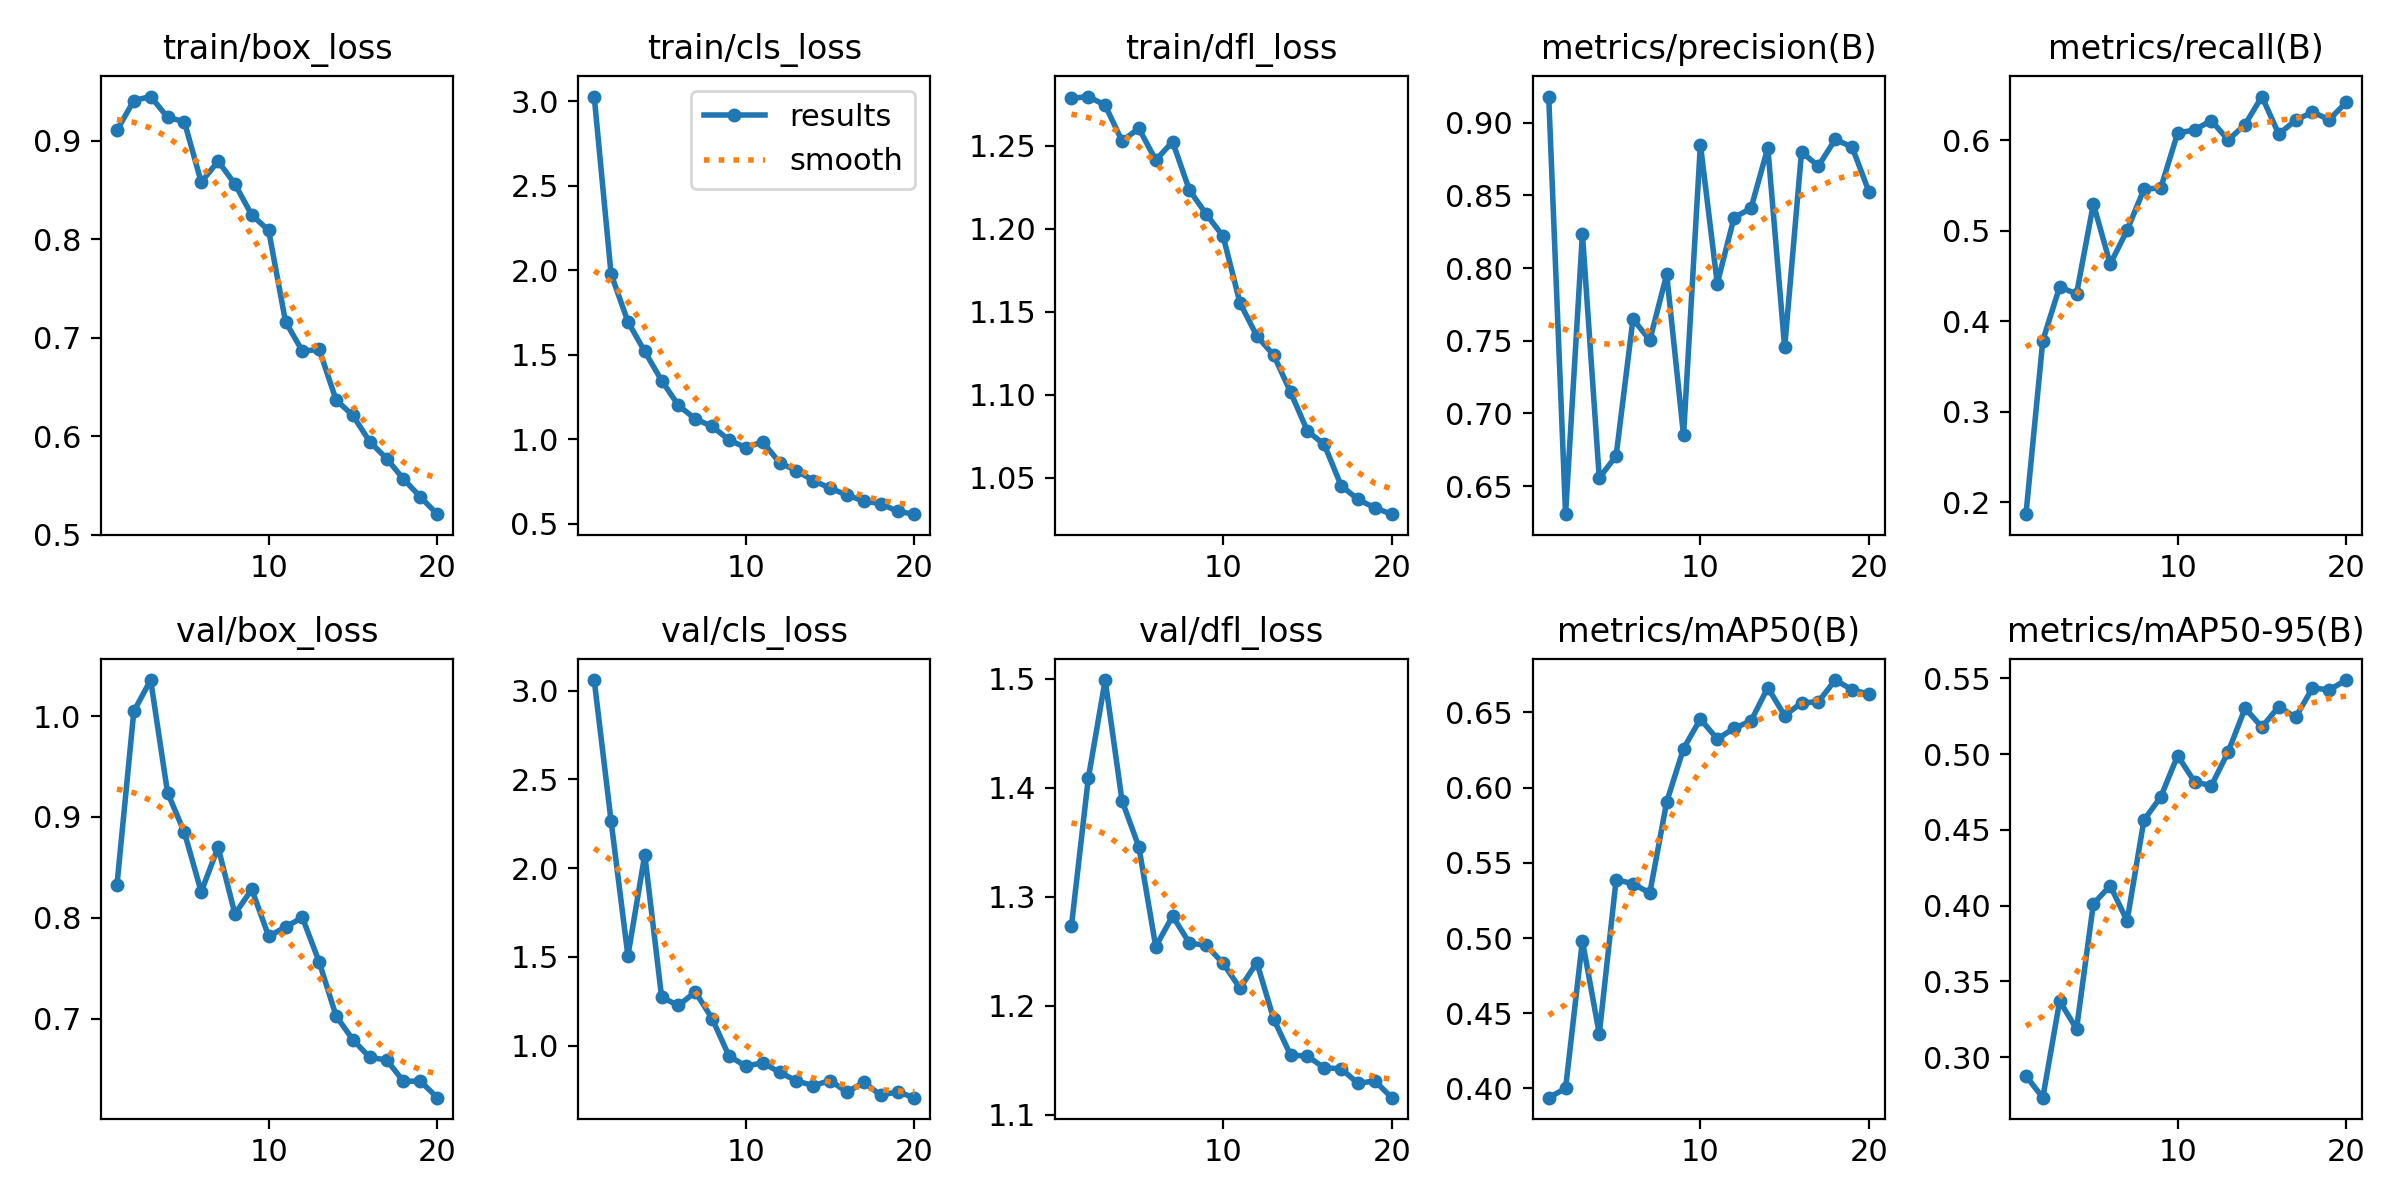

In [5]:

Image("/content/runs/detect/train/results.png", width=600)


image 1/1 /content/meningioma_3.png: 384x640 1 NO_tumor, 1 meningioma, 86.6ms
Speed: 2.1ms preprocess, 86.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


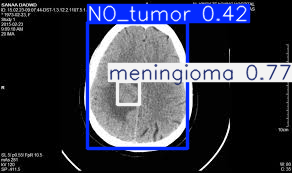

In [10]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/meningioma_3.png", save=True)
results[0].show()


In [11]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 0.], device='cuda:0')
conf: tensor([0.7653, 0.4232], device='cuda:0')
data: tensor([[117.9626,  81.2901, 139.1703, 104.7248,   0.7653,   2.0000],
        [ 87.7394,  22.7568, 187.9479, 148.1060,   0.4232,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (173, 292)
shape: torch.Size([2, 6])
xywh: tensor([[128.5665,  93.0074,  21.2078,  23.4347],
        [137.8437,  85.4314, 100.2084, 125.3492]], device='cuda:0')
xywhn: tensor([[0.4403, 0.5376, 0.0726, 0.1355],
        [0.4721, 0.4938, 0.3432, 0.7246]], device='cuda:0')
xyxy: tensor([[117.9626,  81.2901, 139.1703, 104.7248],
        [ 87.7394,  22.7568, 187.9479, 148.1060]], device='cuda:0')
xyxyn: tensor([[0.4040, 0.4699, 0.4766, 0.6053],
        [0.3005, 0.1315, 0.6437, 0.8561]], device='cuda:0')


In [12]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/content/meningioma_3.png")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /content/meningioma_3.png: 384x640 1 NO_tumor, 1 meningioma, 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


100%|██████████| 154M/154M [00:01<00:00, 108MB/s]


Results saved to runs/segment/predict
